In [159]:
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer

In [161]:
import csv
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('dataset.csv',names=DATASET_COLUMNS,encoding=DATASET_ENCODING,engine='python',error_bad_lines=False)
df.head(5)

<ipython-input-161-b4d609e56fec>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('dataset.csv',names=DATASET_COLUMNS,encoding=DATASET_ENCODING,engine='python',error_bad_lines=False)


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [162]:
del df['flag']

In [163]:
df.size

2017905

In [164]:
df.columns

Index(['target', 'ids', 'date', 'user', 'text'], dtype='object')

In [165]:
df.shape

(403581, 5)

In [166]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   5
Count of rows in the data is:   403581


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403581 entries, 0 to 403580
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  403581 non-null  int64 
 1   ids     403581 non-null  int64 
 2   date    403581 non-null  object
 3   user    403581 non-null  object
 4   text    403581 non-null  object
dtypes: int64(2), object(3)
memory usage: 15.4+ MB


In [168]:
import numpy as np
np.sum(df.isnull().any(axis=1))

0

In [169]:
df['target'].unique()


array([0, 4])

In [170]:
df['target'].nunique()

2

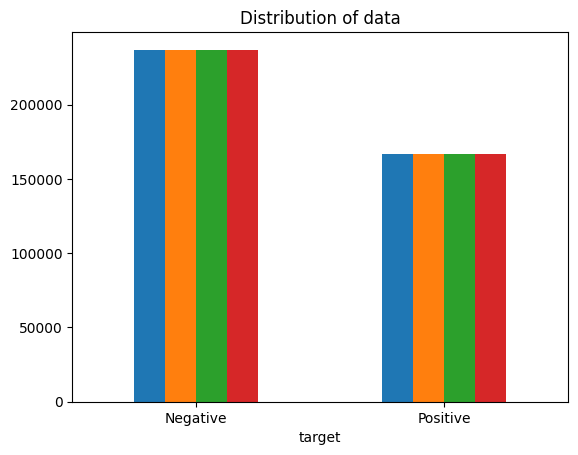

In [171]:

ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

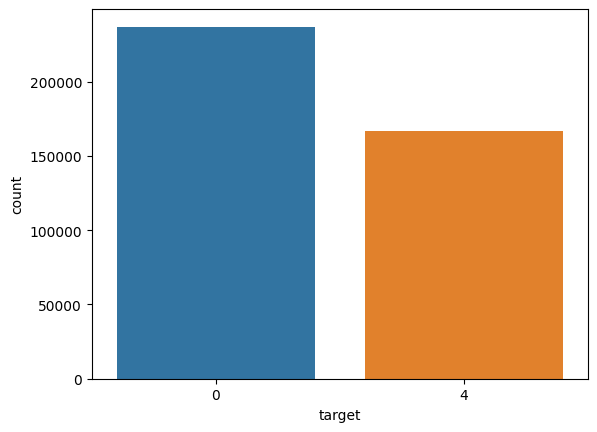

In [172]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [173]:

data=df[['text','target']]
data.loc[:,'target'].replace(4, 1, inplace=True)
data


<ipython-input-173-77b7a2eb307c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'target'].replace(4, 1, inplace=True)


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
403576,@Wattyz uh oh. urgent care? call-a-nurse? egad...,0
403577,"my leg is blooding, its interesting, buut stil...",0
403578,@HeYSiD Yeap! I wanted my money back Don't th...,0
403579,@cathy_cochina40 no he's not!!! Lol u know my ...,0


In [174]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]


In [175]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]


In [176]:
dataset = pd.concat([data_pos, data_neg])

In [177]:

dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    @rufusisnodufus wanted 2 go 2 festival but too...
19996    i bought a new pair of shoes. again. die. ever...
19997    on my way to da hospital with ka jr...  my bat...
19998    fun times last nite, but payin 4 it 2day... co...
19999    everything i own is in pville and im two hours...
Name: text, dtype: object

In [178]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [179]:

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

133314           @leealison smiles! thank you!! beer garden
133315    wanna know secret? kinda weird but goes: i'm l...
133316    finally got around listing roving! pretty mead...
133317    @luther87 ice ice baby! safe madtown! hope @rk...
133318                              @john_foley i'll always
Name: text, dtype: object

In [180]:


import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    rufusisnodufus wanted 2 go 2 festival but bleh...
19996           bought new pair shoes again die every week
19997     way da hospital ka jr battery probably gonna die
19998    fun times last nite but payin 4 2day could bar...
19999    everything pville im two hours north wednesday...
Name: text, dtype: object

In [181]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    rufusisnodufus wanted 2 go 2 festival but bleh...
19996           bought new pair shoes again die every week
19997     way da hospital ka jr battery probably gonna die
19998    fun times last nite but payin 4 2day could bar...
19999    everything pville im two hours north wednesday...
Name: text, dtype: object

In [182]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    rufusisnodufus wanted 2 go 2 festival but bleh...
19996           bought new pair shoes again die every week
19997     way da hospital ka jr battery probably gonna die
19998    fun times last nite but payin 4 2day could bar...
19999    everything pville im two hours north wednesday...
Name: text, dtype: object

In [183]:

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    rufusisnodufus wanted  go  festival but bleh h...
19996           bought new pair shoes again die every week
19997     way da hospital ka jr battery probably gonna die
19998    fun times last nite but payin  day could barel...
19999    everything pville im two hours north wednesday...
Name: text, dtype: object

In [184]:

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text']

133314              []
133315    [w, w, w, w]
133316             [w]
133317             [w]
133318             [w]
              ...     
19995           [w, w]
19996           [w, w]
19997              [w]
19998           [w, w]
19999           [w, w]
Name: text, Length: 40000, dtype: object

In [185]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()


133314              []
133315    [w, w, w, w]
133316             [w]
133317             [w]
133318             [w]
Name: text, dtype: object

In [186]:
X=data.text
y=data.target

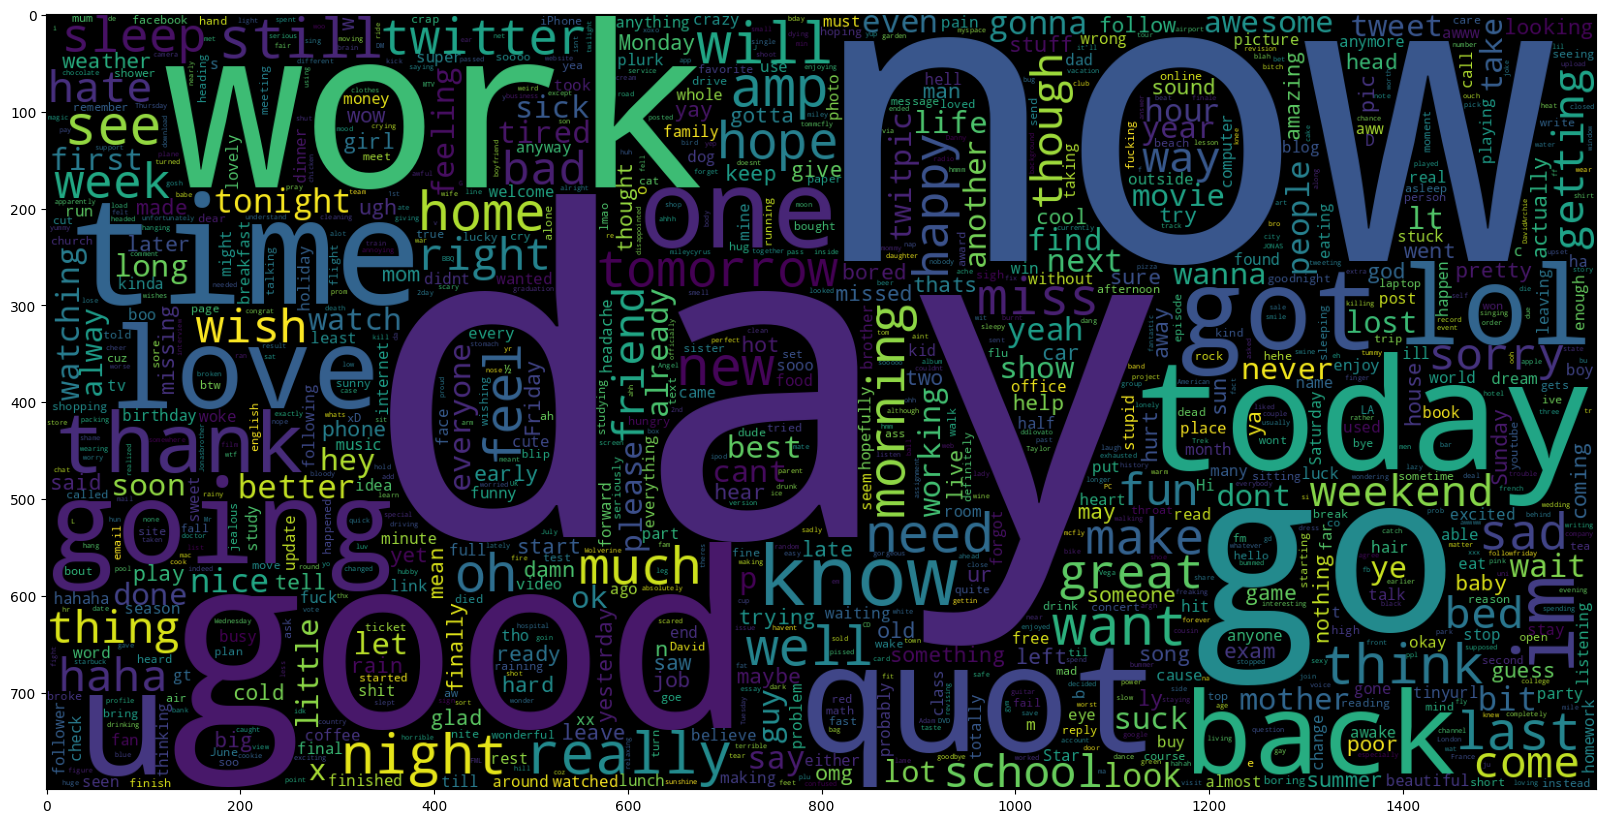

In [187]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [188]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)


In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [190]:

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [191]:
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model):
   y_pred = model.predict(X_test)
   print(classification_report(y_test, y_pred))
   cf_matrix = confusion_matrix(y_test, y_pred)
   categories = ['Negative','Positive']
   group_names = ['True Neg','False Pos', 'False Neg','True Pos']
   group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
   labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
   xticklabels = categories, yticklabels = categories)
   plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
   plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
   plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)





              precision    recall  f1-score   support

           0       0.81      0.86      0.83     11753
           1       0.78      0.72      0.75      8427

    accuracy                           0.80     20180
   macro avg       0.80      0.79      0.79     20180
weighted avg       0.80      0.80      0.80     20180



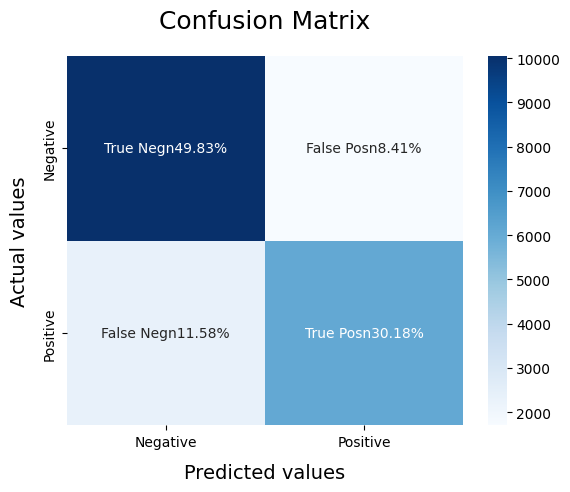

In [192]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

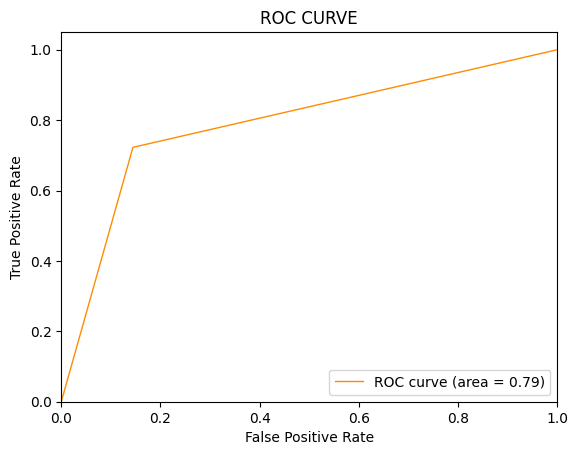

In [193]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     11753
           1       0.78      0.76      0.77      8427

    accuracy                           0.81     20180
   macro avg       0.81      0.81      0.81     20180
weighted avg       0.81      0.81      0.81     20180



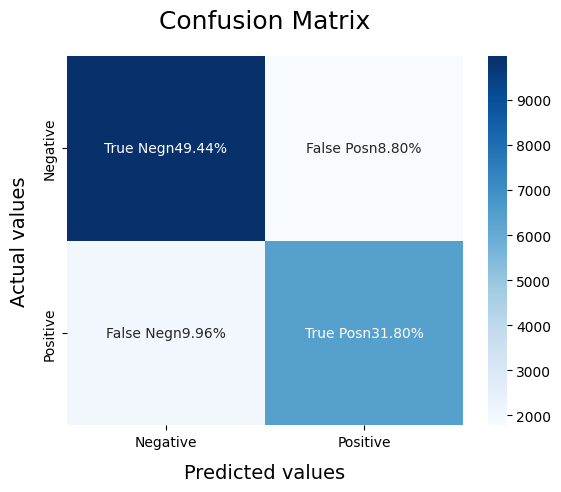

In [194]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

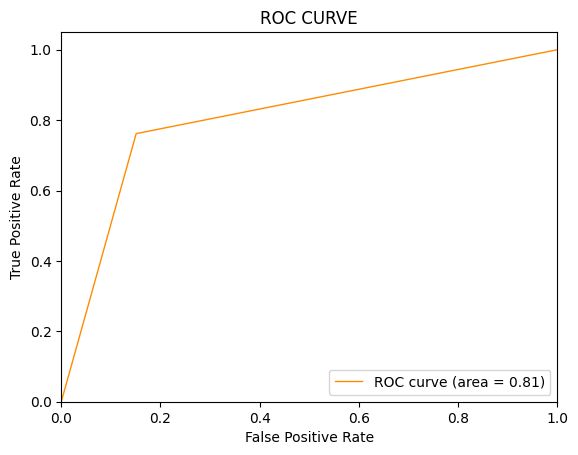

In [195]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     11753
           1       0.80      0.76      0.78      8427

    accuracy                           0.82     20180
   macro avg       0.82      0.81      0.81     20180
weighted avg       0.82      0.82      0.82     20180



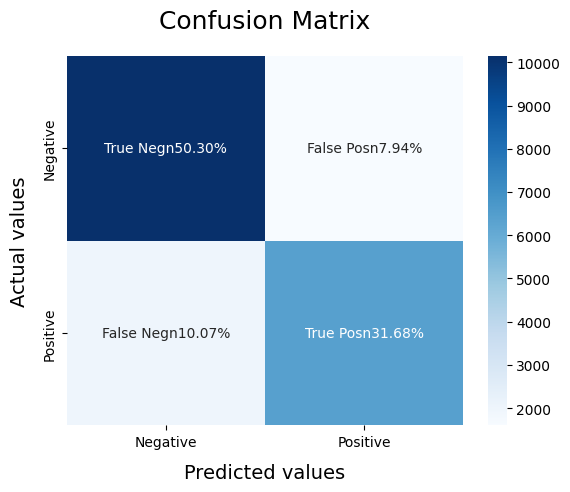

In [196]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

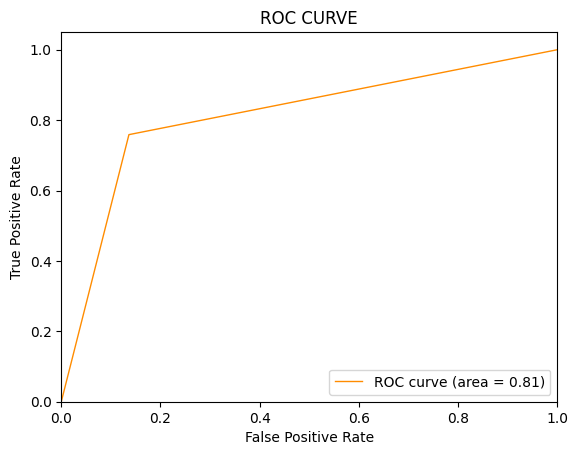

In [197]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()